# Data preperation for Basque country

* geographic sourrounding
* Population density in sourrounding
* most important flows to and from the regions (all data)
* transport activity within regions
* 

In [339]:
# data sources
path_nuts = "C:\PhD\Projekte\GitHub\commercialfleet\geography/NUTS_RG_03M_2021_3857/"
etis_data = "C:\PhD\Projekte\iDesignRES\Data\etis_2010_harmonised/etis_2010_modelled/"
# geographic data 

basque_nut = "ES21"
basque_nuts_3 = ["ES211", "ES212", "ES213"]
neighbours_nuts_2 = ["ES22", "ES23", "ES41", "ES13"]
neighbours_nuts_3 = ["ES220", "ES230", "ES412", "ES130"]


In [340]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

##  visualization of geopandas



In [341]:
file = gpd.read_file(path_nuts)
print(file.keys())
neighbours_n3 = file[file["NUTS_ID"].isin(neighbours_nuts_3)]
basque = file[file["NUTS_ID"].isin(basque_nuts_3)]
basque_n3 = file[file["NUTS_ID"] == basque_nut]
neighbours_n2 = file[file["NUTS_ID"].isin(neighbours_nuts_2)]

Index(['NUTS_ID', 'LEVL_CODE', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME',
       'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'FID', 'geometry'],
      dtype='object')


    NUTS_ID  LEVL_CODE CNTR_CODE                   NAME_LATN  \
240    ES22          2        ES  Comunidad Foral de Navarra   
241    ES23          2        ES                    La Rioja   
416    ES41          2        ES             Castilla y León   
433    ES13          2        ES                   Cantabria   

                      NUTS_NAME  MOUNT_TYPE  URBN_TYPE  COAST_TYPE   FID  \
240  Comunidad Foral de Navarra         0.0        NaN           0  ES22   
241                    La Rioja         0.0        NaN           0  ES23   
416             Castilla y León         0.0        NaN           0  ES41   
433                   Cantabria         0.0        NaN           0  ES13   

                                              geometry  
240  MULTIPOLYGON (((-192460.602 5357148.754, -1859...  
241  POLYGON ((-324344.643 5164401.155, -327035.124...  
416  MULTIPOLYGON (((-538901.941 5339518.250, -5392...  
433  MULTIPOLYGON (((-450390.867 5276508.191, -4513...  


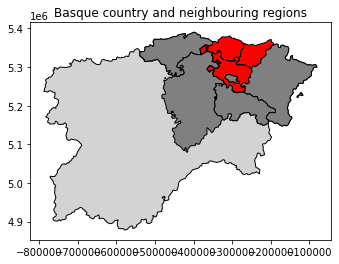

In [342]:

fig, ax = plt.subplots()
basque.plot(ax=ax, color="None", edgecolor="black", zorder=10)
neighbours_n3.plot(ax=ax, color="grey", edgecolor="black", zorder=5)
basque_n3.plot(ax=ax, color="red", edgecolor="red", zorder=3)
neighbours_n2.plot(ax=ax, color="lightgrey", edgecolor="black", zorder=0)
plt.title("Basque country and neighbouring regions")
print(neighbours_n2)

# TODO: indicate Bilbao + Infrastructure (get this from Open Street Map)




Text(0.5, 1.0, 'Basque country: regional transport activity')

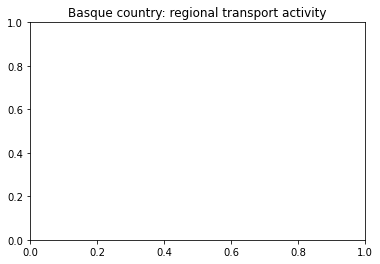

In [343]:
fig, ax = plt.subplots()
plt.title("Basque country: regional transport activity")
#  https://www.investinspain.org/en/why-spain/infrastructures
 

Text(0.5, 1.0, 'Basque country: vehicle stock')

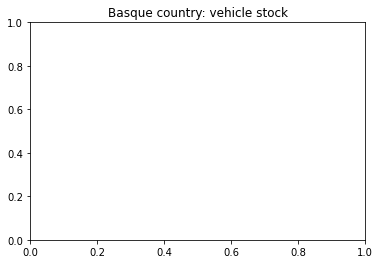

In [344]:
plt.title("Basque country: vehicle stock")


In [345]:
# TODO: find flows to where the freight transport goes and where it comes from (ETIS data)

etis_codes = {
    "ES": 110,
    "ES1": 11001,
    "ES2": 11002,
    "ES4": 11004,
    "ES41": 1100401,
    "ES13": 1100103,
    "ES21": 1100201,
    "ES22": 1100202,
    "ES23": 1100203,
    "ES24": 1100204,
    "ES211": 110020101,
    "ES212": 110020102,
    "ES213": 110020103,
    "ES220": 110020200,
    "ES230": 110020300,
    "ES412": 110040102,
    "ES130": 110010300
}

mode_codes = {
    1: "Car",
    2: "Rail",
    3: "Bus",
    4: "Air",
    5: "TramMetro",
    6: "Walking",
    7: "Cycling"
}

etis_codes_nuts_3 = {key: value for key, value in etis_codes.items() if len(key) == 5}
reverse_etis_codes = {value: key for key, value in etis_codes.items()}
reverse_etis_codes_nuts_3 = {value: key for key, value in etis_codes_nuts_3.items()}
print(reverse_etis_codes)


{110: 'ES', 11001: 'ES1', 11002: 'ES2', 11004: 'ES4', 1100401: 'ES41', 1100103: 'ES13', 1100201: 'ES21', 1100202: 'ES22', 1100203: 'ES23', 1100204: 'ES24', 110020101: 'ES211', 110020102: 'ES212', 110020103: 'ES213', 110020200: 'ES220', 110020300: 'ES230', 110040102: 'ES412', 110010300: 'ES130'}


what to do? 
* get to know etis codes of the basque country
* first: passenger cars
* then: trucks 


In [346]:
filename_mode_trips = "p_transport_car.csv"

p_mode_trips_csv = pd.read_csv(etis_data + filename_mode_trips)
print(p_mode_trips_csv.keys())

Index(['ID', 'ORIGINZONE_3_ID', 'DEST_ZONE_3_ID', 'TRIP_PURPOSE_ID',
       'p_transport_car_trips', 'p_transport_car_vehicles'],
      dtype='object')


In [347]:
# filtering for the three nuts_3 regions
# cut_off_value = 100 * 365
filtered_origin_flows = []
filtered_destination_flows = []
df = pd.DataFrame(columns=list(p_mode_trips_csv.keys()))
for nut in basque_nuts_3 + neighbours_nuts_3:
    curr_etis_code = etis_codes[nut]
    temp_origins = p_mode_trips_csv[p_mode_trips_csv["ORIGINZONE_3_ID"] == curr_etis_code]
    temp_origins = temp_origins.sort_values(by='p_transport_car_trips', ascending=False)
    temp_dest = p_mode_trips_csv[p_mode_trips_csv["DEST_ZONE_3_ID"] == curr_etis_code]
    temp_dest = temp_dest.sort_values(by='p_transport_car_trips', ascending=False)
    total_flows_origin = temp_origins['p_transport_car_trips'].sum()
    total_flows_dest = temp_dest['p_transport_car_trips'].sum()
    # temp_origins = temp_origins[temp_origins['p_transport_tot_trips_mode'] > cut_off_value]
    # temp_dest = temp_dest[temp_dest['p_transport_tot_trips_mode'] > cut_off_value]
    temp_origins = temp_origins[temp_origins['DEST_ZONE_3_ID'].isin(etis_codes.values())]
    temp_dest = temp_dest[temp_dest['ORIGINZONE_3_ID'].isin(etis_codes.values())]
    filtered_origin_flows.append(temp_origins)
    filtered_destination_flows.append(temp_dest)
    temp_origins.to_csv("temp_data/origin_flows_" + nut + ".csv")
    temp_dest.to_csv("temp_data/destination_flows_" + nut + ".csv")
    df = pd.concat([df, temp_origins, temp_dest], ignore_index=True)


    print(nut, temp_origins['p_transport_car_trips'].sum()/total_flows_origin * 100)
    print(nut, temp_dest['p_transport_car_trips'].sum()/total_flows_dest * 100)
    
df = df.drop_duplicates(subset=['ORIGINZONE_3_ID', 'DEST_ZONE_3_ID', "TRIP_PURPOSE_ID"], keep="last")
df = df[df["p_transport_car_trips"]>0]
df.to_csv("temp_data/extended_flows_v2.csv")

ES211 98.7946164176074
ES211 99.70867087351657
ES212 98.20864703814493
ES212 99.790290683737
ES213 98.45577661276302
ES213 99.82780804288565
ES220 98.60187808802627
ES220 99.4127905539273
ES230 98.05397671884472
ES230 98.68374779268937
ES412 98.2675508710801
ES412 98.03090269669221
ES130 97.67983329957643
ES130 98.29200710903268


In [348]:
import ast

_reduced_flows = pd.read_csv("temp_data/total_origin_destination_flows_edited_with_routes.csv", sep=";")
_extended_flows = pd.read_csv("temp_data/extended_flows_v2.csv")
_extended_flows["path"] = None

for kl in range(len(_extended_flows)):
    temp_od_touple = (_extended_flows.iloc[kl]["ORIGINZONE_3_ID"], _extended_flows.iloc[kl]["DEST_ZONE_3_ID"])
    temp_reduced_flow_df = _reduced_flows[(_reduced_flows["ORIGINZONE_3_ID"] == temp_od_touple[0]) & (_reduced_flows["DEST_ZONE_3_ID"] == temp_od_touple[1])]
    if len(temp_reduced_flow_df) > 0:
        _extended_flows.at[kl, "path"] = ast.literal_eval(temp_reduced_flow_df.iloc[0]["path"])

    elif temp_od_touple[0] == temp_od_touple[1]:
        _extended_flows.at[kl, "path"] = str([(reverse_etis_codes[temp_od_touple[0]], reverse_etis_codes[temp_od_touple[1]])])

_extended_flows.to_csv("temp_data/extended_flows_with_routes_v2.csv", sep=";")

In [349]:
# checking manual edits 
edited_flows = pd.read_csv("temp_data/extended_flows_with_routes_v2_manually_edited.csv", sep=";")
print(edited_flows.keys())
print(edited_flows.path)
for kl in range(len(edited_flows)):
    temp_od_touple = (edited_flows.iloc[kl]["ORIGINZONE_3_ID"], edited_flows.iloc[kl]["DEST_ZONE_3_ID"])
    # temp_reduced_flow_df = _reduced_flows[(_reduced_flows["ORIGINZONE_3_ID"] == temp_od_touple[0]) & (_reduced_flows["DEST_ZONE_3_ID"] == temp_od_touple[1])]
    temp_path = ast.literal_eval(edited_flows.iloc[kl]["path"])
    origin = temp_path[0][0]
    destination = temp_path[0][-1]
    if not origin == reverse_etis_codes[temp_od_touple[0]] or not destination == reverse_etis_codes[temp_od_touple[1]]:
        print(kl, origin, destination, temp_od_touple, temp_path)


Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'ORIGINZONE_3_ID', 'DEST_ZONE_3_ID',
       'TRIP_PURPOSE_ID', 'p_transport_car_trips', 'p_transport_car_vehicles',
       'path'],
      dtype='object')
0               [('ES211', 'ES211')]
1               [('ES211', 'ES211')]
2               [('ES211', 'ES211')]
3               [('ES212', 'ES211')]
4               [('ES212', 'ES211')]
                   ...              
182             [('ES412', 'ES130')]
183    [('ES230', 'ES213', 'ES130')]
184    [('ES220', 'ES213', 'ES130')]
185             [('ES412', 'ES130')]
186    [('ES230', 'ES213', 'ES130')]
Name: path, Length: 187, dtype: object


In [350]:
edges_old = gpd.read_file("C:/Users\golab\PycharmProjects\OTTER\geometries/regions_intersected/edges_nuts_3.shp")
print(edges_old.keys())

Index(['from', 'to', 'ehb_distan', 'ehb_dist_1', 'geometry'], dtype='object')


In [351]:
# add distances 
# create edge connections -> get for each edge the distance -> translate 
from geometry_utils import calculate_true_length
from shapely.geometry import LineString

distance_df = pd.read_csv(etis_data  + "p_imp_road.csv")
print(distance_df.keys())
distance_column = "p_imp_road_distance"

edges_gdf = gpd.GeoDataFrame(columns=["from", "to", "geometry", "distance_own_calculation", "distance_from_etis"])
# creating edges between all NUTS3 
nuts_3_regions_of_interest = file[file.NUTS_ID.isin(etis_codes_nuts_3.keys())]

neighbours = [("ES130", "ES412"), ("ES130", "ES213"), ("ES213", "ES412"), ("ES213", "ES211"), ("ES213", "ES212"), ("ES412", "ES211"), ("ES412", "ES230"), ("ES211", "ES212"), ("ES211", "ES220"), ("ES211", "ES230"), ("ES212", "ES220"), ("ES220", "ES230")]

for nb_pair in neighbours:
    node_1 = nb_pair[0]
    node_2 = nb_pair[1]
    node_1_nuts_extract = file[file.NUTS_ID == node_1]
    node_2_nuts_extract = file[file.NUTS_ID == node_2]
    # print(node_1, node_2)
    centroid_1 = node_1_nuts_extract.geometry.centroid.iloc[0]
    centroid_2 = node_2_nuts_extract.geometry.centroid.iloc[0]
    etis_node_1 = etis_codes[node_1]
    etis_node_2 = etis_codes[node_2]
    line = LineString([centroid_1, centroid_2])
    dist = calculate_true_length(line)
    dist_etis = distance_df[(distance_df["ORIGINZONE_3_ID"] == etis_codes[node_1]) & (distance_df["DEST_ZONE_3_ID"] == etis_codes[node_2])][distance_column].iloc[0]
    edges_gdf = edges_gdf.append({'from': node_1, 'to': node_2, 'geometry': line, "distance_own_calculation": dist, "distance_from_etis": dist_etis*1000}, ignore_index=True)


edges_gdf.to_file("temp_data/ES_edges_nuts_3.shp")
edges_gdf.to_csv("temp_data/ES_edges_nuts_3.csv")

Index(['ID', 'ORIGINZONE_3_ID', 'DEST_ZONE_3_ID', 'TR_PRP_A_ID',
       'p_imp_road_distance', 'p_imp_road_time', 'p_imp_road_userCosts',
       'p_imp_road_tollCosts'],
      dtype='object')


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array inte

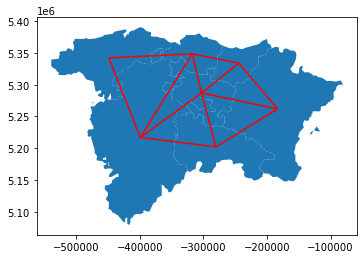

In [352]:
# visualize the edges

fig, ax = plt.subplots()
nuts_3_regions_of_interest.plot(ax=ax)
edges_gdf.plot(ax=ax, zorder=10, color="red")
plt.savefig("case studies\Basque_country_1/geographic_extend.pdf")

In [353]:
destination_folder = "case studies\Basque_country_1/"



In [354]:
# create a file for transport activity
import pandas as pd
import yaml

# Sample DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'London']
})

# Convert DataFrame to dictionary
data_dict = df.to_dict(orient='records')

# Write the dictionary to a YAML file
with open('output.yaml', 'w') as file:
    yaml.dump(data_dict, file, default_flow_style=False)


# routes? -> doing this by hand


# Scaling of travel demand for the NUTS-3 regions

In [355]:
average_path_lengths = {
    "urban": {1: 10000, 2: 4000, 3: 60000, 4: 6000}, 
    "rural": {1: 15000, 2: 5000, 3: 60000, 4: 20000}
    }   # for now these are rough estimates not based on real data

mode_split = {
    "urban": 0.31,
    "rural": 0.57
}
# "region_urban", "region_nonurban", "interregional"
travel_demand = pd.DataFrame(columns=["from", "to", "type", "num_trips", "pkm", "veh_flow", "purpose", "path", "distance"])
# edited_flows.keys()
origins = edited_flows["ORIGINZONE_3_ID"].to_list()
destinations = edited_flows["DEST_ZONE_3_ID"].to_list()
paths = edited_flows["path"].to_list()
purposes = edited_flows["TRIP_PURPOSE_ID"].to_list()
trips = edited_flows["p_transport_car_trips"].to_list()
vehicle_flows = edited_flows["p_transport_car_vehicles"].to_list()
cities = pd.read_csv("temp_data/cities.csv")

# getting total population nbs. 
# Read the Excel file
excel_file = pd.ExcelFile('D:\save_spot\iDesignRES/demo_r_pjangrp3_page_spreadsheet.xlsx')

# Read the first sheet
df_sheet1 = pd.read_excel(excel_file, sheet_name='Sheet 1', header=10)

# filter the sheet for the ones of interest
df_sheet1 = df_sheet1[df_sheet1["GEO (Codes)"].isin(etis_codes_nuts_3.keys())]

# Read the third sheet
# splitting the trips between urban and nonurban
for kl in range(len(origins)):
    temp_orig = reverse_etis_codes[origins[kl]]
    temp_dest = reverse_etis_codes[destinations[kl]]
    print(kl, origins[kl], destinations[kl])
    if temp_orig == temp_dest:
        temp_purpose = purposes[kl]
        temp_sheets = df_sheet1[df_sheet1["GEO (Codes)"] == temp_orig]
        total_population = temp_sheets["Unnamed: 20"].to_list()[0]
        temp_cities_df = cities[cities["NUTS_ID"] == temp_orig]
        if len(temp_cities_df) > 0:
            city_population = temp_cities_df["population"].sum()
        else:
            city_population = 0

        rural_population = total_population - city_population

        f_mode_ratio_urban = mode_split["urban"]/(mode_split["urban"] + mode_split["rural"])
        f_mode_ratio_rural = mode_split["rural"]/(mode_split["urban"] + mode_split["rural"])

        f_pip_ratio_urban = city_population/total_population
        f_pip_ratio_rural = rural_population/total_population

        f_tot_urban = f_mode_ratio_urban * f_pip_ratio_urban
        f_tot_rural = f_mode_ratio_rural * f_pip_ratio_rural

        f_urban = f_tot_urban/(f_tot_urban + f_tot_rural)
        f_rural = f_tot_rural/(f_tot_urban + f_tot_rural)

        # adding regional trips
        temp_df = pd.DataFrame({"from": [temp_orig], "to": [temp_dest], "type": ["region_urban"], "num_trips": [trips[kl] * f_urban],"pkm": [average_path_lengths["urban"][temp_purpose] * trips[kl] * f_urban], "veh_flow": [vehicle_flows[kl] * f_urban],"purpose": [temp_purpose], "path": [paths[kl]], "distance": [average_path_lengths["urban"][temp_purpose]]}) 
        travel_demand = pd.concat([travel_demand, temp_df], ignore_index=True)
        
        temp_df = pd.DataFrame({"from": [temp_orig], "to": [temp_dest], "type": ["region_rural"],"num_trips": [trips[kl] * f_rural], "pkm": [average_path_lengths["rural"][temp_purpose] * trips[kl] * f_rural], "veh_flow": [vehicle_flows[kl] * f_rural], "purpose": [temp_purpose], "path": [paths[kl]], "distance": [average_path_lengths["rural"][temp_purpose]]})
        travel_demand = pd.concat([travel_demand, temp_df], ignore_index=True)
    
    else:
        dist_etis_extract = distance_df[(distance_df["ORIGINZONE_3_ID"] == origins[kl]) & (distance_df["DEST_ZONE_3_ID"] == destinations[kl])]
        dist_etis = dist_etis_extract[distance_column].iloc[0]
        pkm = trips[kl] * dist_etis * 1000
        temp_df = pd.DataFrame({"from": [temp_orig], "to": [temp_dest], "type": ["interregional"], "num_trips": [trips[kl]], "pkm": [pkm], "veh_flow": [vehicle_flows[kl]], "purpose": [temp_purpose], "path": [paths[kl]], "distance": [dist_etis*1000]})

        travel_demand = pd.concat([travel_demand, temp_df], ignore_index=True)

    # adding not regional trips

travel_demand.to_csv("temp_data/travel_demand.csv")
travel_demand_copy = travel_demand.copy()


c:\Users\golab\anaconda3\envs\gdal2\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


0 110020101 110020101
1 110020101 110020101
2 110020101 110020101
3 110020102 110020101
4 110020102 110020101
5 110020102 110020101
6 110020102 110020101
7 110020102 110020102
8 110020102 110020102
9 110020102 110020102
10 110020101 110020102
11 110020101 110020102
12 110020101 110020102
13 110020101 110020102
14 110020103 110020102
15 110020103 110020101
16 110020103 110020101
17 110020103 110020102
18 110020103 110020101
19 110020103 110020102
20 110020103 110020102
21 110020103 110020101
22 110020103 110020103
23 110020103 110020103
24 110020103 110020103
25 110020102 110020103
26 110020102 110020103
27 110020101 110020103
28 110020101 110020103
29 110020102 110020103
30 110020101 110020103
31 110020102 110020103
32 110020101 110020103
33 110020200 110020102
34 110020200 110020102
35 110020200 110020101
36 110020200 110020101
37 110020200 110020102
38 110020200 110020101
39 110020200 110020101
40 110020200 110020103
41 110020200 110020102
42 110020200 110020103
43 110020200 11002010

## 1st goal: vehicle stock sizing 

Objects to create:
* Odpair
* Path
* Mode
* Product
* Vehicletype
* Technology
* TechVehicle


-> which constraints? just like "B": vehicle stock sizing


In [356]:
# create paths 
# travel_demand: id, name, length (distance), nodes(path)
travel_demand_copy = travel_demand_copy[["distance", "path"]]
print(len(travel_demand_copy))
travel_demand_copy = travel_demand_copy.drop_duplicates(keep="first")
print(len(travel_demand_copy))

travel_demand_copy.to_csv("temp_data/filtered_paths.csv")

travel_demand_copy.reset_index(drop=True, inplace=True)
travel_demand_copy["id"] = travel_demand_copy.index
travel_demand_copy["name"] = [""] * len(travel_demand_copy)
travel_demand_copy= travel_demand_copy[["id", "name", "distance", "path"]]

path_list = []

for index, row in travel_demand_copy.iterrows():
    path = {
        "id": row["id"],
        "name": row["id"],
        "length": row["distance"],
        "nodes": list(ast.literal_eval(row["path"])[0])
    }
    path_list.append(path)

# create od_pairlist

odpair_list = []

travel_demand_copy_2 = travel_demand.copy()
travel_demand_copy_2 = travel_demand_copy_2[["from", "to", "path", "num_trips"]]
travel_demand_copy_2["product"] = ["passenger"] * len(travel_demand_copy_2)
travel_demand_copy_2.rename(columns={"path": "paths"}, inplace=True)
travel_demand_copy_2["id"] = travel_demand_copy_2.index
travel_demand_copy_2.rename(columns={"num_trips": "F"}, inplace=True)
travel_demand_copy_2["product"] = ["passenger"] * len(travel_demand_copy_2)

travel_demand_copy_2["path_id"] = travel_demand_copy_2["paths"].apply(lambda x: travel_demand_copy.loc[travel_demand_copy["path"] == x, "id"].values[0])

for index, row in travel_demand_copy_2.iterrows():
    od_pair = {
        "id": row["id"],
        "from": row["from"],
        "to": row["to"],
        "path_id": row["path_id"],
        "product": row["product"],
        "F": row["F"]
    }
    odpair_list.append(od_pair)

node_list = []

# create a list of dictionaries with id and name from reverse_etis_codes_nuts_3
node_list = [{"id": idx, "name": key} for idx, key in enumerate(etis_codes_nuts_3.keys())]



208
85


In [357]:
Y = 1
import yaml

data = {
    "TechVehicle":[
        {"id":1,
        "name":"passenger car with combustion engine",
        "vehicle_type":"passenger car",
        "technology":"combustion engine",
        "capital_cost": 30000,
        "W":[1.4] * Y,
        "spec_cons":[27.44] * Y,
        "Lifetime": [12] * Y,
        "AnnualRange": [15000] * Y,
        "products":["passengers"],
        }
    ],
    "Vehicletype":[
        {"id":1,
        "name":"passenger car",
        "mode":"road",
        }
    ],
    "Mode":[ 
        {"id":1,
        "name":"road",
        }
    ],
    "Technology":[
        {"id":1,
        "name":"combustion engine",
        "fuel": "diesel",
        }
    ],
    "Fuel":[
        {"id":1,
        "name":"diesel",
        "cost_per_kWh": 0.163,
        }
    ],
    "Product":[
        {"id":1,
        "name":"passengers",
        }
    ],
    "Odpair": odpair_list,
    "Path": path_list,
    "Node": node_list,
}



In [358]:
# saving as YAML
with open("temp_data/transport_data.yaml", "w") as file:
    yaml.dump(data, file, default_flow_style=False)